AUTHOR: MATTEO FOSSATI

NOTEBOOK FOR THE REDUCTION AND ANALYSIS OF TELESCOPE IMAGING DARKS




**Bias**: lo si calcola sapendo com'è datta l'elettronica, si fa una misurazione a tempo zero con shutterspeed chiuso, la dark current è sicuramente bassissima o zero grazie allo shutterspeed chiuso, quindi riesco a trovare direttamente il bias in questo caso  
**Dark** current: tolto il bias, comunque ci arrivano elettroni nel sensore a shutterspeed chiuso, da dove? tendenzialmente dalla temperatura, cresce linearmente nel tempo con slope diverso a seconda della temperatura, ed è anch'essa da eliminare  
**Flat**: una volta calibratio bias e dark current, il nostro sensore comunque sia non cattura tutte le porzioni dell'immagine in maniera lineare, bisogna calibrarlo misurando una flat (immagine bianca) con esposizione cortissima, e vedere dove misura più e dove meno, equalizzando tutto.


In [86]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as mp
#from google.colab import drive
import glob

In [87]:
#drive.mount('/content/drive/', force_remount=True)
path = "../datasets/images/Imaging Calibs/"

In [88]:
!ls "../datasets/images/Imaging Calibs/"

calibrations_0_001_bias.fit	   calibrations__009_flatOIII20k.fit
calibrations_0_001_dark10.fit	   calibrations__009_flatOIII30k.fit
calibrations_0_001_dark1200.fit    calibrations__009_flatOIII5s.fit
calibrations_0_001_dark300.fit	   calibrations__009_flatOIII6s.fit
calibrations_0_001_dark60.fit	   calibrations__009_flatSI30k.fit
calibrations_0_001_dark900.fit	   calibrations__009_flatSII10k.fit
calibrations_0_002_bias.fit	   calibrations__009_flatSII20k.fit
calibrations_0_002_dark10.fit	   calibrations__009_flatSII5s.fit
calibrations_0_002_dark1200.fit    calibrations__009_flatSII6s.fit
calibrations_0_002_dark300.fit	   calibrations__010_flatHa10k.fit
calibrations_0_002_dark60.fit	   calibrations__010_flatHa20k.fit
calibrations_0_002_dark900.fit	   calibrations__010_flatHa30k.fit
calibrations_0_003_bias.fit	   calibrations__010_flatHa5s.fit
calibrations_0_003_dark10.fit	   calibrations__010_flatHa6s.fit
calibrations_0_003_dark1200.fit    calibrations__010_flatOIII10k.fit
calibrations_

# Once the calibrations have been identified generate a list of the exptimes and temperatures

In [89]:
exptimes = [10,60,300,900,1200]
ccdtemps = [-20,-10,0,8]
ccdtstr  = ['minus20','minus10','0','8']

ccdgain = 0.6 #ADU/e-


# First we have to stack the bias frames, let's choose temp of -20 as a test

In [90]:
files = glob.glob(path+'*minus20*bias*')
files

['../datasets/images/Imaging Calibs/calibrations_minus20_006_bias.fit',
 '../datasets/images/Imaging Calibs/calibrations_minus20_003_bias.fit',
 '../datasets/images/Imaging Calibs/calibrations_minus20_008_bias.fit',
 '../datasets/images/Imaging Calibs/calibrations_minus20_002_bias.fit',
 '../datasets/images/Imaging Calibs/calibrations_minus20_005_bias.fit',
 '../datasets/images/Imaging Calibs/calibrations_minus20_007_bias.fit',
 '../datasets/images/Imaging Calibs/calibrations_minus20_001_bias.fit',
 '../datasets/images/Imaging Calibs/calibrations_minus20_004_bias.fit',
 '../datasets/images/Imaging Calibs/calibrations_minus20_009_bias.fit']

In [91]:
Nfiles = len(files)
print(Nfiles)

9


In [92]:
hdu = fits.open(files[0])
bias0 = hdu[0].data
hdu.close()

ny, nx = np.shape(bias0)
median = np.median(bias0)
std    = np.std(bias0)
print(median, std)

329.0 23.14122736425578


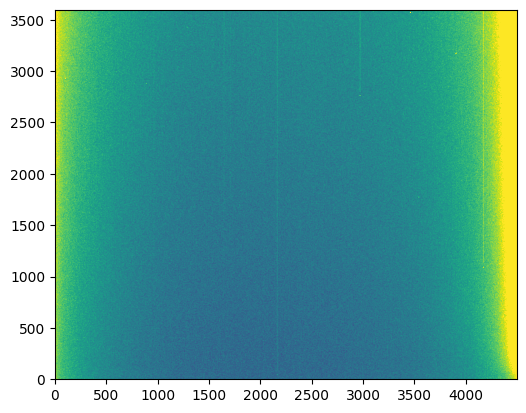

In [93]:
mp.imshow(bias0, origin='lower', clim=(0.9*median,1.1*median))

Text(0.5, 0, 'Counts (ADU)')

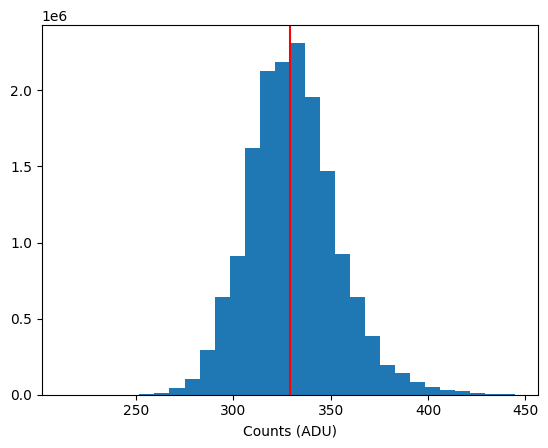

In [94]:
values = mp.hist(bias0.flatten(), range=(median-5*std, median+5*std), bins=30)
mp.axvline(median, color='red')
mp.xlabel('Counts (ADU)')

# Now Stack the Bias frames into the master bias

In [95]:
allbias = np.zeros((Nfiles,ny,nx))

for ind, ff in enumerate(files):
  hdu = fits.open(ff)
  allbias[ind,...] = hdu[0].data
  hdu.close()

masterbias = np.mean(allbias, axis=0)
del allbias

In [96]:
print('Median value of MASTERBIAS: {}'.format(np.median(masterbias)))
print('Median value of one BIAS: {}'.format(median))

Median value of MASTERBIAS: 328.22222222222223
Median value of one BIAS: 329.0


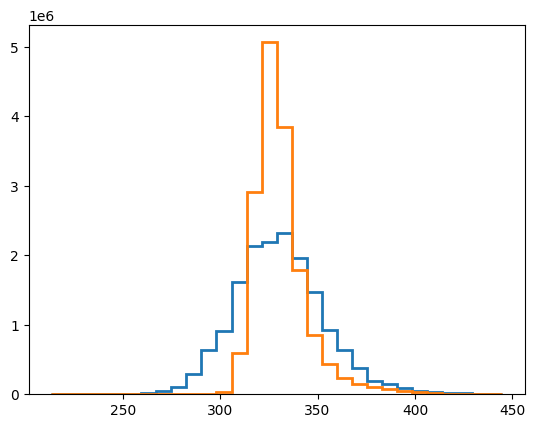

In [97]:
values = mp.hist(bias0.flatten(), range=(median-5*std, median+5*std), bins=30, lw=2, histtype='step')
values = mp.hist(masterbias.flatten(), range=(median-5*std, median+5*std), bins=30, lw=2, histtype='step')

# We are now ready to analyze the Dark frames, which have two main contributions: 1. The bias level, and 2. The dark current that depends on the exposure time. The latter is also expected to depend on temperature.

In [98]:
files = glob.glob(path+'*minus20*dark900*')
#if you want to read only 10 exposures use

In [99]:
Nfiles = len(files)

In [100]:
dark0 = (fits.open(files[0])[0].data).astype(float)
ny, nx = np.shape(dark0)

dark0 -= masterbias

median = np.median(dark0)
std    = np.std(dark0)

14.888888888888914


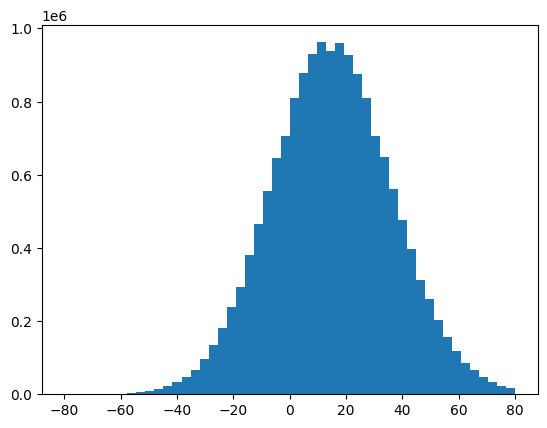

In [101]:
values = mp.hist(dark0.flatten(), range=(-80, 80), bins=50)
print(median)

In [102]:
alldark = np.zeros((Nfiles,ny,nx))

for ind, ff in enumerate(files):
  hdu = fits.open(ff)
  alldark[ind,...] = hdu[0].data
  hdu.close()

masterdark = np.mean(alldark, axis=0)
masterdark -= masterbias
del alldark

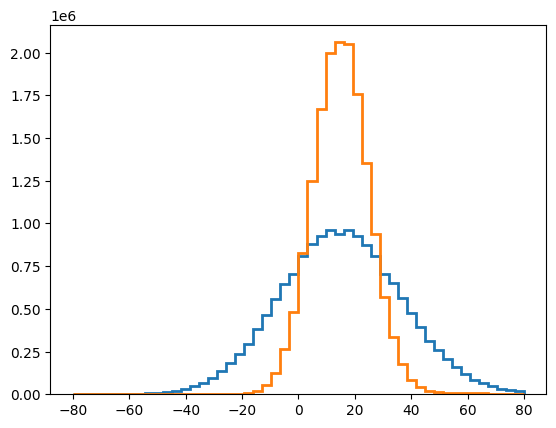

In [103]:
values = mp.hist(dark0.flatten(), range=(-80,80), bins=50, lw=2, histtype='step')
values = mp.hist(masterdark.flatten(), range=(-80,80), bins=50, lw=2, histtype='step')

----

# Your Assignement: Now study the dependence of the dark current as a function of exposure time and CCD temperature.



In [104]:
!ls "../datasets/images/Imaging Calibs/"

calibrations_0_001_bias.fit	   calibrations__009_flatOIII20k.fit
calibrations_0_001_dark10.fit	   calibrations__009_flatOIII30k.fit
calibrations_0_001_dark1200.fit    calibrations__009_flatOIII5s.fit
calibrations_0_001_dark300.fit	   calibrations__009_flatOIII6s.fit
calibrations_0_001_dark60.fit	   calibrations__009_flatSI30k.fit
calibrations_0_001_dark900.fit	   calibrations__009_flatSII10k.fit
calibrations_0_002_bias.fit	   calibrations__009_flatSII20k.fit
calibrations_0_002_dark10.fit	   calibrations__009_flatSII5s.fit
calibrations_0_002_dark1200.fit    calibrations__009_flatSII6s.fit
calibrations_0_002_dark300.fit	   calibrations__010_flatHa10k.fit
calibrations_0_002_dark60.fit	   calibrations__010_flatHa20k.fit
calibrations_0_002_dark900.fit	   calibrations__010_flatHa30k.fit
calibrations_0_003_bias.fit	   calibrations__010_flatHa5s.fit
calibrations_0_003_dark10.fit	   calibrations__010_flatHa6s.fit
calibrations_0_003_dark1200.fit    calibrations__010_flatOIII10k.fit
calibrations_

In [125]:
res_darks = {}

for temp in ccdtstr:
    res_darks[temp] = {}  # Initialize the inner dictionary for each temp value
    for exptime in exptimes:
        file_dark = glob.glob(f'{path}*{temp}*dark*{exptime}*')
        alldark = np.zeros((len(file_dark), ny, nx))

        # calculate all the darks for a given temperature and exposure time
        for ind, ff in enumerate(file_dark):
            hdu = fits.open(ff)
            alldark[ind,...] = hdu[0].data
            hdu.close()

        # make the master dark by averaging all the darks
        masterdark = np.mean(alldark, axis=0)
        masterdark -= masterbias
        res_darks[temp][exptime] = np.mean(masterdark)
        
        # Delete alldark to free up memory
        del alldark
        
res_darks

{'minus20': {10: -0.4082430194920007,
  60: 2.089355776624925,
  300: 7.843475011914226,
  900: 18.468421040315864,
  1200: 23.55452868415851},
 'minus10': {10: 3.498760350759446,
  60: 8.745824498583858,
  300: 27.263716512759437,
  900: 79.0447148169254,
  1200: 98.37760031319897},
 '0': {10: 8.809182938295995,
  60: 15.556768797561165,
  300: 43.02074071715788,
  900: 108.3418902364284,
  1200: 140.6739208934693},
 '8': {10: 17.742374852162897,
  60: 28.09131547377364,
  300: 75.24207975607335,
  900: 177.2826209192142,
  1200: 245.33412611307617}}

In [123]:
res_means = {}

# Master bias does not depend on exposure time, it is taken instantly with the shortest exposure time
for j, temp in enumerate(ccdtstr):
    file_mean = glob.glob(f'{path}*{temp}*bias*')
    allmean = np.zeros((len(file_mean), ny, nx))
    
    # calculate all the means for a given temperature
    for ind, ff in enumerate(file_mean):
        hdu = fits.open(ff)
        allmean[ind,...] = hdu[0].data
        hdu.close()

    # make the master mean by averaging all the means
    mastermean = np.mean(allmean, axis=0)
    mastermean -= masterbias
    res_means[temp] = np.mean(mastermean)
    
    # Delete allmean to free up memory
    del allmean

res_means


{'minus20': 0.0,
 'minus10': 2.8498854046435524,
 '0': 8.512593303762038,
 '8': 16.792926050567576}

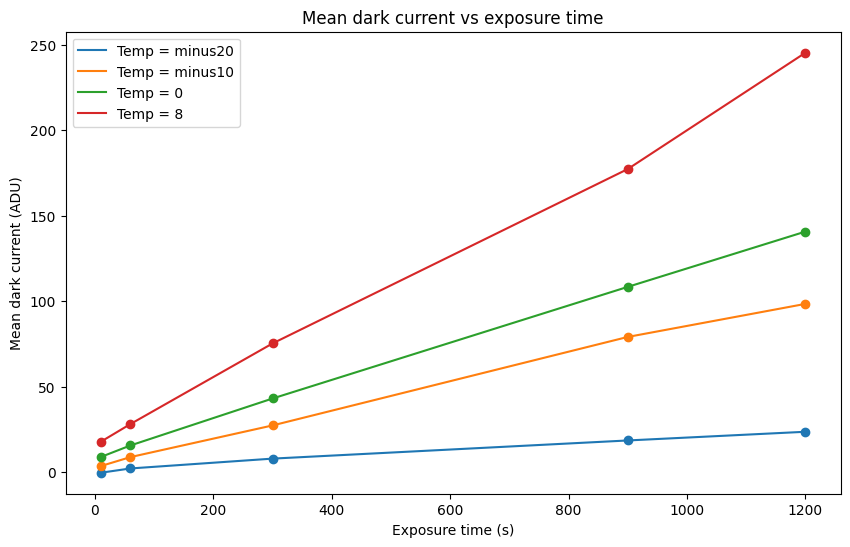

In [124]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for temp in ccdtstr:
    ax.plot(exptimes, [res_darks[temp][exptime] for exptime in exptimes], label=f'Temp = {temp}')
    ax.scatter(exptimes, [res_darks[temp][exptime] for exptime in exptimes])
ax.set_title('Mean dark current vs exposure time')
ax.set_xlabel('Exposure time (s)')
ax.set_ylabel('Mean dark current (ADU)')
ax.legend()
plt.show()



As we can see, the dark current grows linearly with different slope given by different temperature